<a href="https://colab.research.google.com/github/JinMana/DeepLearniing/blob/master/vgg_19_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.misc
import os

In [0]:
#下载vgg-19的模型
import os
if not os.path.isfile('./data/imagenet-vgg-verydeep-19.mat'):
  !wget http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat

--2019-01-22 11:47:04--  http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576042600 (549M) [text/plain]
Saving to: ‘imagenet-vgg-verydeep-19.mat.1’

imagenet-vgg-veryde 100%[===================>] 549.36M  22.6MB/s    in 25s     

2019-01-22 11:47:30 (21.9 MB/s) - ‘imagenet-vgg-verydeep-19.mat.1’ saved [576042600/576042600]



In [0]:
def conv(input_1, weights, bias):
  #weights不变量
  conv_result = tf.nn.conv2d(input_1, tf.constant(weights), strides=(1,1,1,1), padding='SAME')
  return tf.nn.bias_add(conv_result, bias)

def relu(input_1):
  return tf.nn.relu(input_1)

def pool(input_1):
  pool_result = tf.nn.max_pool(input_1, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
  return pool_result

def pre_process(image, mean_pixel):
  '''
  预处理，减去均值
  '''
  return image - mean_pixel

def un_pre_process(image, mean_pixel):
  '''
  测绘预处理
  '''
  return image + mean_pixel

def imread(path):
  return scipy.misc.imread(path).astype(np.float32)

def imsave(path, image):
  '''
  图片处理后保存
  '''
  img = np.clip(img, 0, 255).astype(np.uint8)
  scipy.misc.imsave(path, img)
  
print('函数加载完毕')

函数加载完毕


In [0]:
def vgg_net(data_path, images):
  '''
  模型路径
  图片
  '''
  #定义网络层  <class 'tuple'>
  #Fetch argument 'conv1_1' cannot be interpreted as a Tensor. ("The name 'conv1_1' refers to an Operation not in the graph.")
  layers = (
    'conv1_1','relu1_1','conv1_2','relu1_2','pool1',       #第一层两个3*3卷积
      'conv2_1','relu2_1','conv2_2','relu2_2','pool2',     #第二层两个3*3卷积
      'conv3_1','relu3_1','conv3_2','relu3_2','conv3_3',
      'relu3_3','conv3_4','relu3_4','pool3',                #第三层是四个3*3卷积
      'conv4_1','relu4_1','conv4_2','relu4_2','conv4_3',
      'relu4_3','conv4_4','relu4_4','pool4',                #第四层是四个3*3卷积
      'conv5_1','relu5_1','conv5_2','relu5_2','conv5_3',
      'relu5_3','conv5_4','relu5_4'                         #第五层是四个3*3卷积，但是没有池化
  )
  
  #加载vgg模型
  data = scipy.io.loadmat(data_path)
  
  #获取vgg的权重
  weights = data['layers'][0]  #里面是什么样子的  
  
  net = {}
  current = image
  for i, name in enumerate(layers):
    #获取类型conv?pool?relu?
    kind = name[:4]
    
    #conv
    if(kind == 'conv'):
      #获取参数
      kernels, bias = weights[i][0][0][0][0]
      #[w, h,  channel, out_channel]
      kernels = np.transpose(kernels, (1, 0, 2, 3))
      bias = bias.reshape(-1)
      #用这些的来的参数进行卷积操作
      current = conv(current, kernels, bias)
    #relu
    elif(kind == 'relu'):
      current = relu(current)
    #pool
    elif(kind == 'pool'):
      current = pool(current)
    #保存当前操作的结果
    net[name] = current
  assert len(net) == len(layers)
  print("net：",type(net))
  return net, layers

print("vgg_net finish")

vgg_net finish


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


net： <class 'dict'>
[1/36]conv1_1


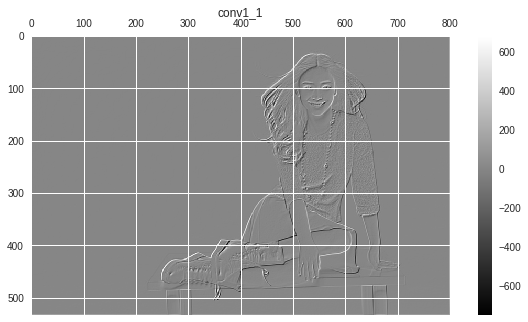

[2/36]relu1_1


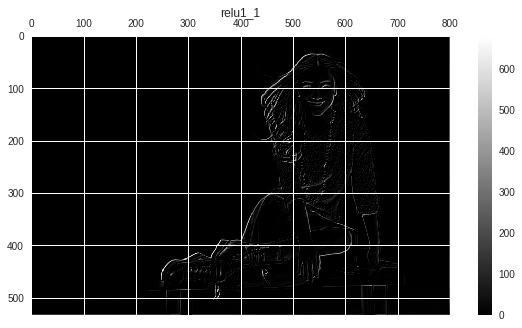

[3/36]conv1_2


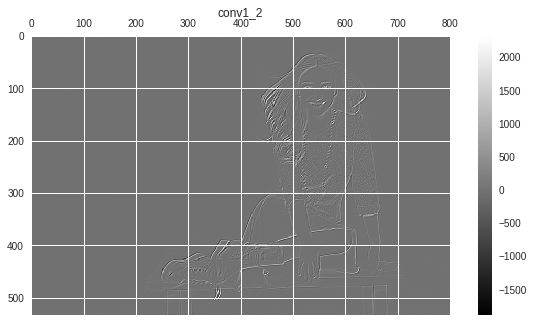

[4/36]relu1_2


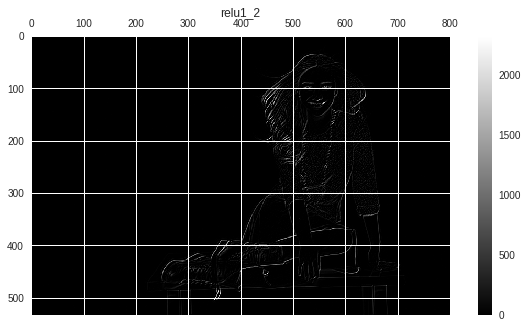

[5/36]pool1


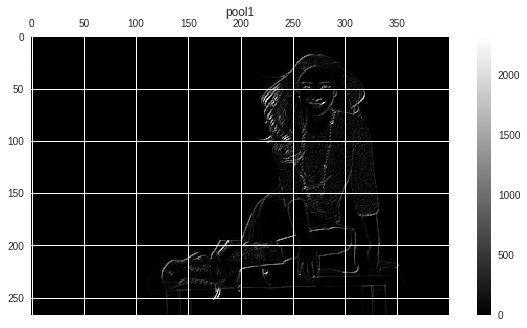

[6/36]conv2_1


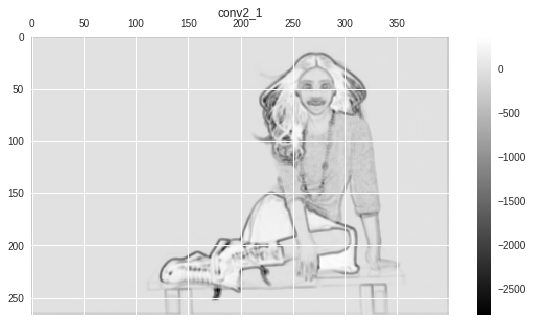

[7/36]relu2_1


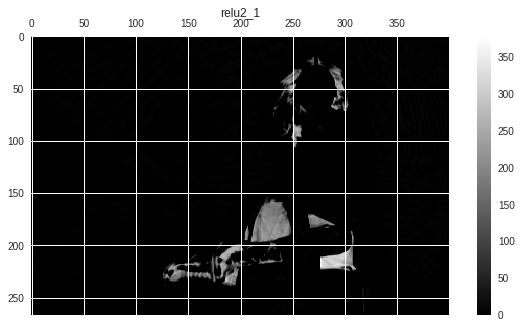

[8/36]conv2_2


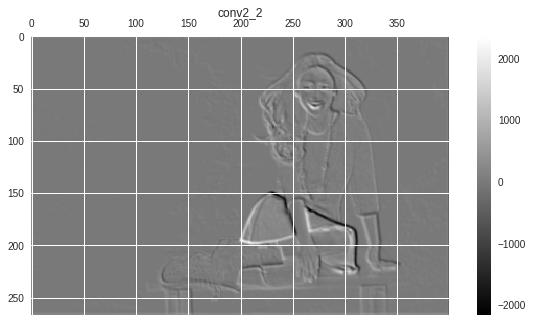

[9/36]relu2_2


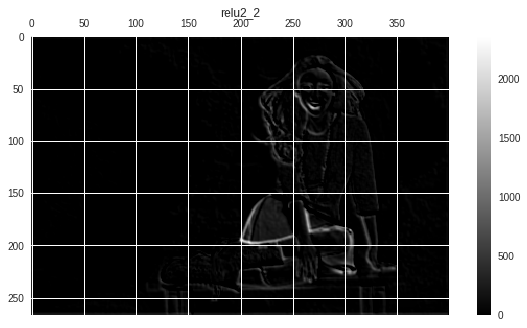

[10/36]pool2


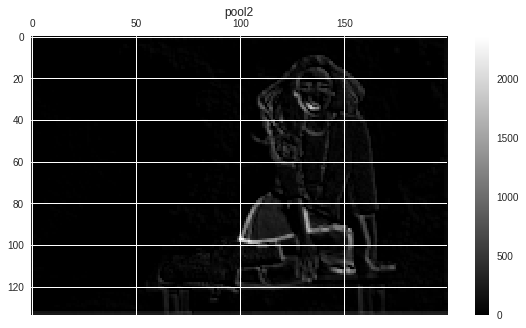

[11/36]conv3_1


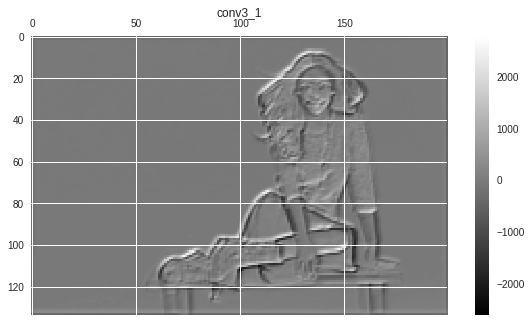

[12/36]relu3_1


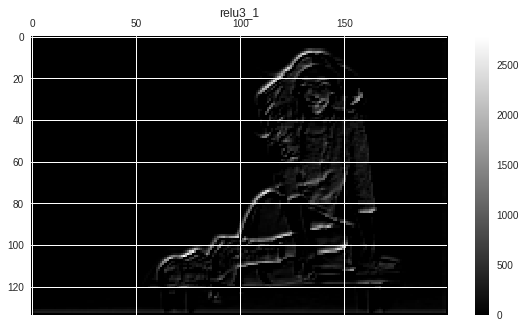

[13/36]conv3_2


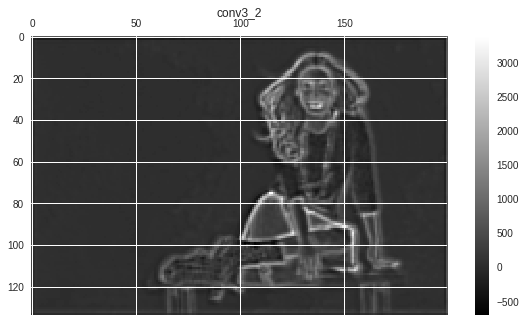

[14/36]relu3_2


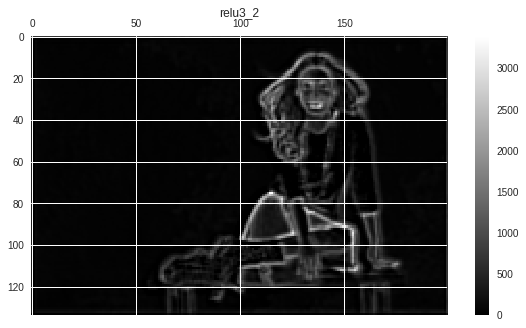

[15/36]conv3_3


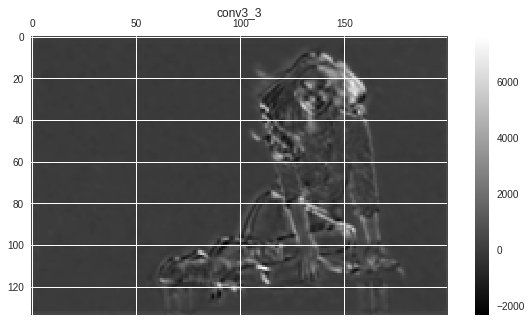

[16/36]relu3_3


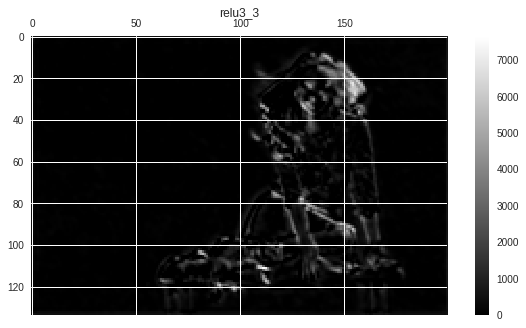

[17/36]conv3_4


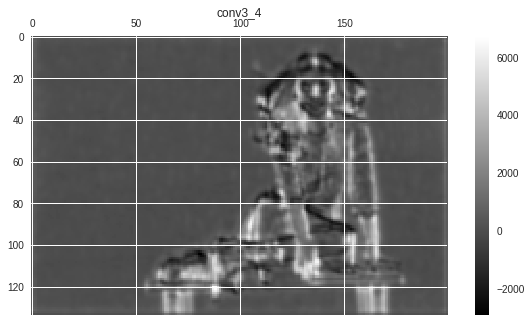

[18/36]relu3_4


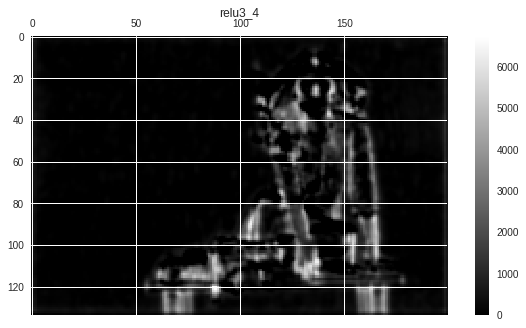

[19/36]pool3


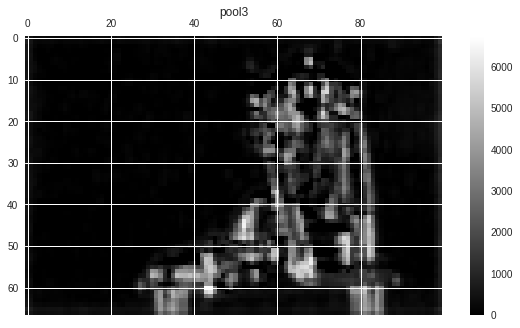

[20/36]conv4_1


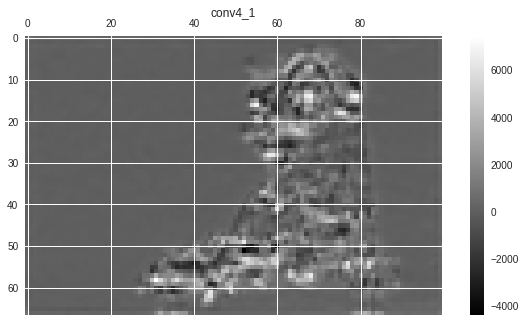

[21/36]relu4_1


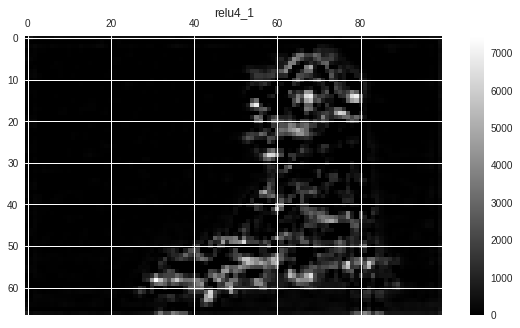

[22/36]conv4_2


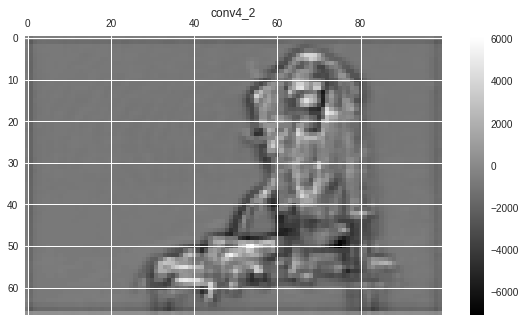

[23/36]relu4_2


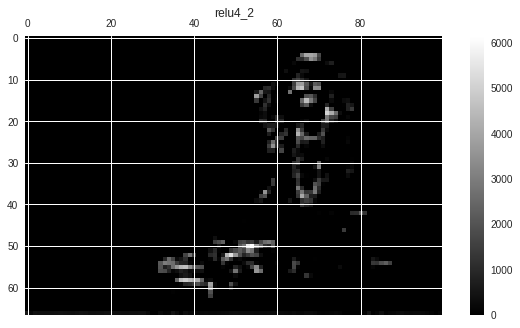

[24/36]conv4_3


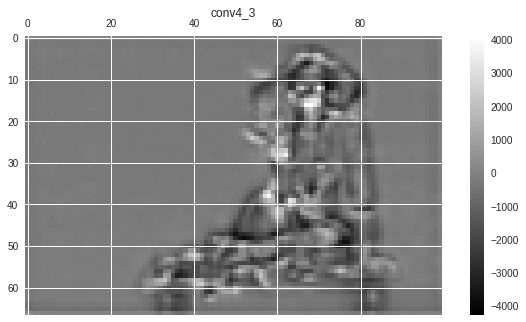

[25/36]relu4_3


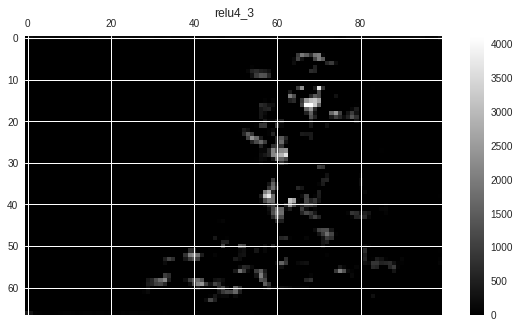

[26/36]conv4_4


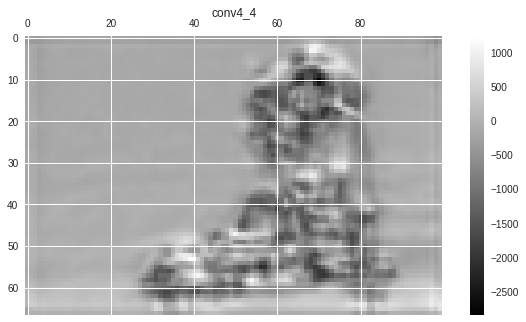

[27/36]relu4_4


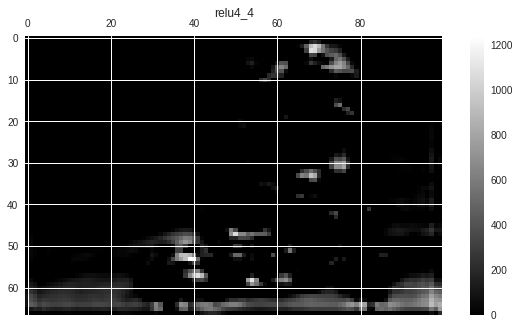

[28/36]pool4


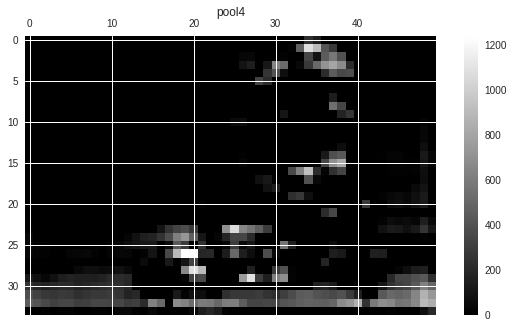

[29/36]conv5_1


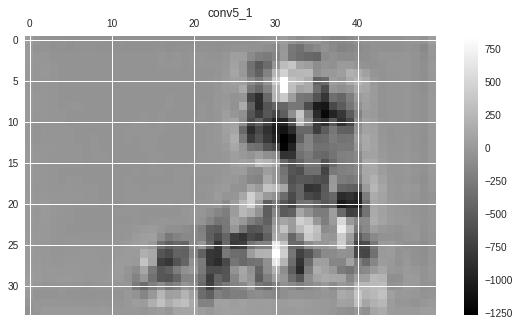

[30/36]relu5_1


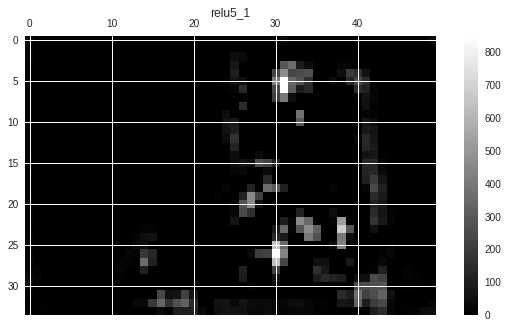

[31/36]conv5_2


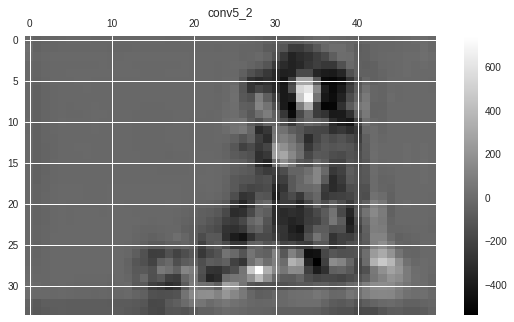

[32/36]relu5_2


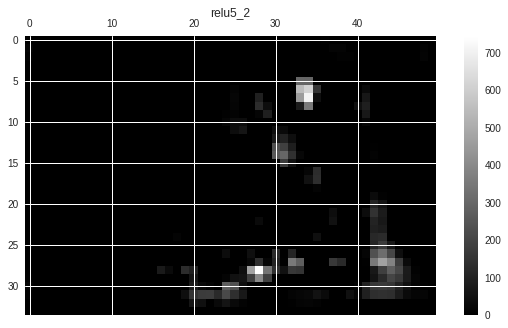

[33/36]conv5_3


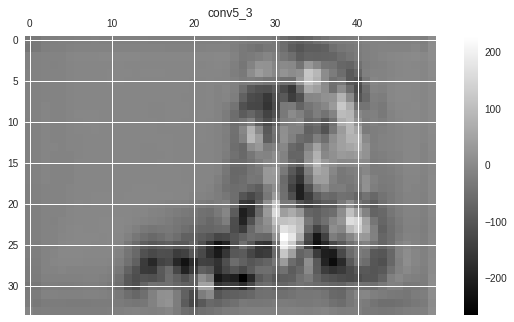

[34/36]relu5_3


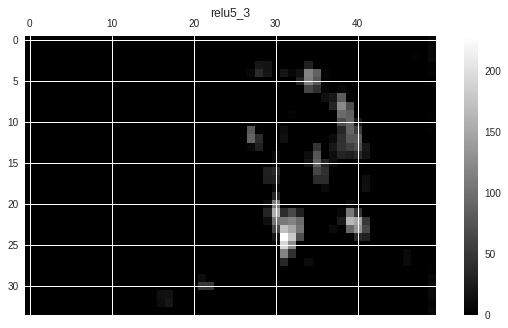

[35/36]conv5_4


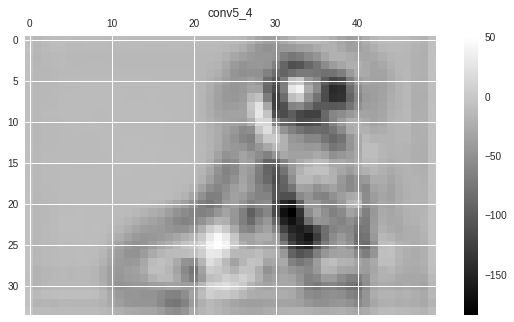

[36/36]relu5_4


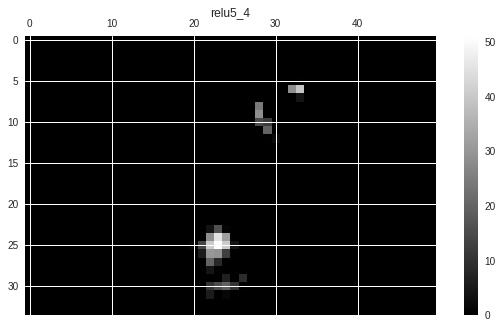

In [0]:
vgg_path = "imagenet-vgg-verydeep-19.mat"
image_path = 'a.jpeg'
mean_pixel = [103.939, 116.779, 123.68]  #这个有什么作用
#读取图片
input_image = imread(image_path)

#定义图片的shape,这里图片的shape没有修改
shape = (1,)+input_image.shape   #(1, h, w, channel)

#图片改变shape
input_image = input_image.reshape(shape)

#将输入的图片进行预处理
input_image_pre = pre_process(input_image, mean_pixel)

#定义占位符
image = tf.placeholder('float', shape=shape)

#看这里，没有输入真实的图片，而是输入占位符的图片，所以这里的占位符要先定义
#vgg_net是一个定义的网络，所以输入的是占位符
#nets是tesor类型，而layers并不是tensor类型
nets, all_layers = vgg_net(vgg_path, image)

with tf.Session() as sess:
  v_net = sess.run([nets], feed_dict={image:input_image_pre})
  for i, layer in enumerate(all_layers):
    #features保存的是每个步骤运行后的结果
    features = v_net[0][layer]
#     feats = sess.run(features)
    #输出运行的步数， 哪个步骤
    print('[%d/%d]%s'%(i+1, len(all_layers), layer))
    
    #这个循环应该是不对的
#     if 1:
    plt.figure(i+1, figsize=(10,5))
    plt.matshow(features[0,:,:,0], cmap=plt.cm.gray, fignum=i+1)
    plt.title(''+layer)
    plt.colorbar()
    plt.show()